train sizes: X, y
(36564, 1) (36564,)
test sizes: X, y
(9141, 1) (9141,)
Coefficients:
[0.02953065]
Intercept:
534.7066548919752
Y predicted
[ 615.32532306  983.01141732 3242.48986325 ...  558.39023433  536.77380023
  534.70665489]
R2 Score:
0.8371393550185807
Mean squared error (MSE) 22175232.874167386
       Actual value  Predicted value    Difference
29245         126.0       615.325323   -489.325323
32335         399.0       983.011417   -584.011417
7618         7326.0      3242.489863   4083.510137
38320          26.0      1784.236950  -1758.236950
21603           0.0       534.706655   -534.706655
39742           8.0       542.118847   -534.118847
20976        1777.0      1374.942173    402.057827
2725          706.0      1081.496127   -375.496127
41903          74.0       560.280196   -486.280196
45309           0.0       535.061023   -535.061023
39864          15.0       561.520483   -546.520483
21387          50.0       555.200924   -505.200924
32468           1.0       534.85

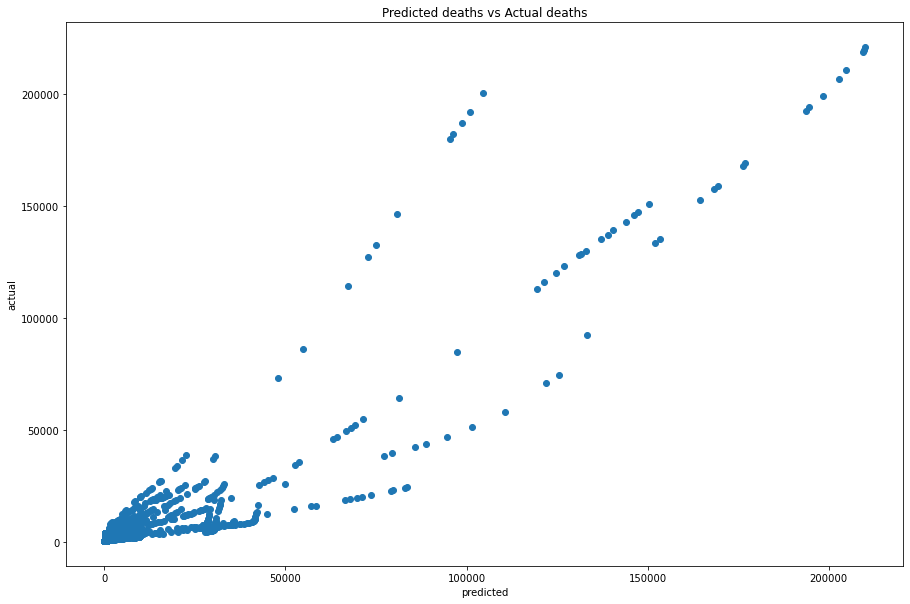

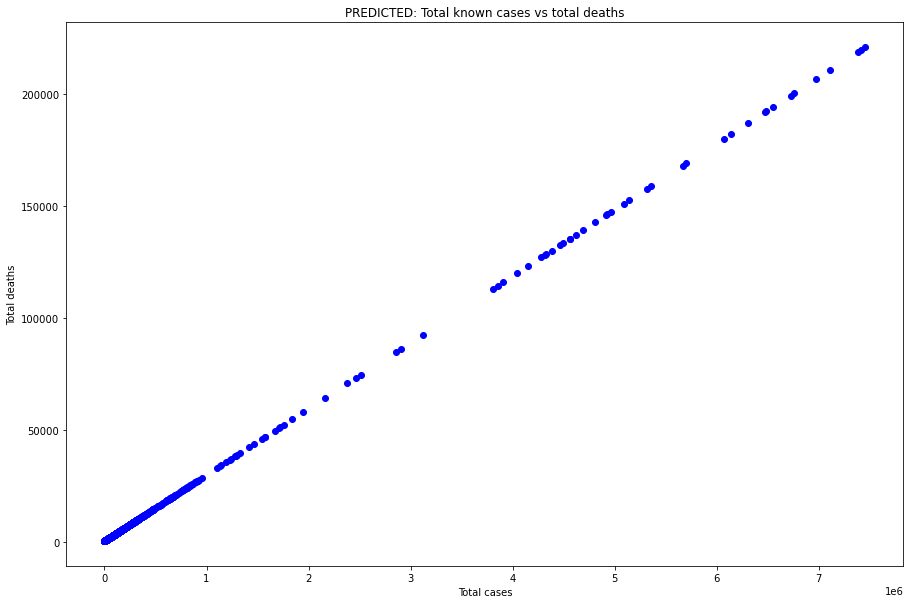

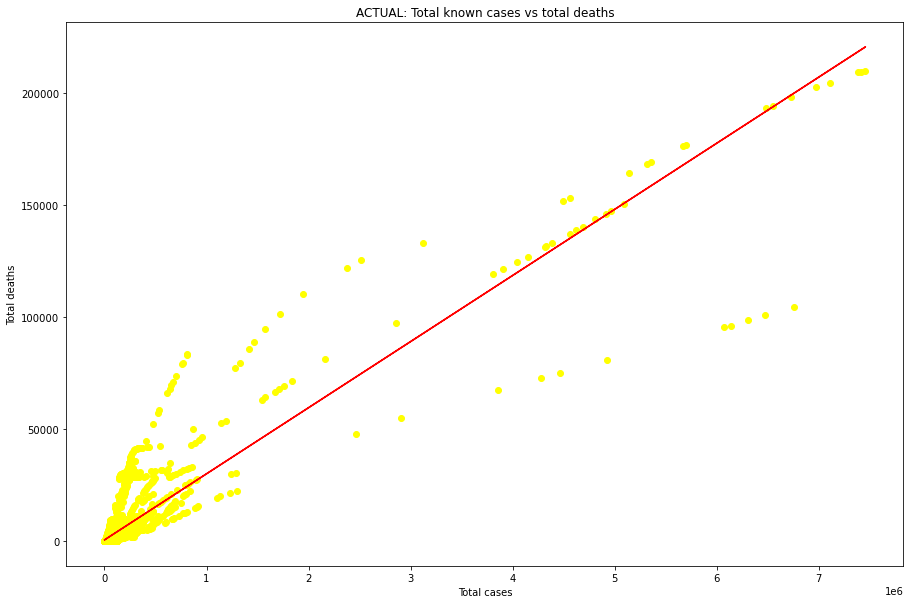

In [251]:
import pandas as pd
import missingno as msno
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
def toBool(any):
    return 1.00 if bool(any) else 0.00


# Read csv and convert test features to bool
df = pd.read_csv('./covid.csv', low_memory=False, converters={'tests_units': toBool})
# Display all columns
pd.set_option('display.max_columns', None)


## -- SPLIT FEATURES/LABELS --
labels = ['total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths','new_deaths', 'new_deaths_smoothed', 
                    'total_cases_per_million', 'new_cases_per_million','new_cases_smoothed_per_million', 
                    'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million']

# Remove international and world rows
df = df.drop(df[pd.isna(df.continent)].index)
# Remove rows where labels are NaN
for label in labels:
    df = df.drop(df[pd.isna(df[label])].index)
    

# Transform test features to 0 if there was not tested
df.loc[df['tests_units'] == 0.00, 
       ['new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_per_case', 'positive_rate']] \
        = 0, 0, 0, 0, 0, 0, 0, 0


# Transform NaN values to the mean value of that feature
numeric_columns = df.select_dtypes(include='number').columns
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
df[numeric_columns] = pd.DataFrame(imputer.fit_transform(df[non_numeric_columns]))


# Remove rows where only Iso code etc. are filled
df.dropna(inplace=True)


# Create labels and features
non_numeric_features = df.drop(columns=labels, axis=1).select_dtypes(exclude='number').columns
features = df.drop(non_numeric_features, axis=1)

X = features
X = features['total_cases'].values.reshape(-1,1)
y = df['total_deaths']

# Split data between learning and test data
x_train,x_test,y_train,y_test = train_test_split(X, y,test_size=0.2, random_state=42)

print('train sizes: X, y')
print(x_train.shape, y_train.shape)
print('test sizes: X, y')
print(x_test.shape, y_test.shape)


# Train a model
ml = LinearRegression()
ml.fit(x_train, y_train)

# Check coefficients
print('Coefficients:')
print(ml.coef_)

# Check intercept
print('Intercept:')
print(ml.intercept_)


# Predict y
y_predicted = ml.predict(x_test)
print('Y predicted')
print(y_predicted)

# Validate predicted y
print('R2 Score:')
print(r2_score(y_test, y_predicted))
print('Mean squared error (MSE)', mean_squared_error(y_test, y_predicted))

# Display differences in numbers

pred_y_df = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_predicted, 'Difference': y_test - y_predicted})
print(pred_y_df[0:20])

# Visualize the validation results
plt.figure(figsize=(15, 10))
plt.scatter(y_test, y_predicted)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Predicted deaths vs Actual deaths')
plt.show()



# Visualize results -> total cases vs total deaths
plt.figure(figsize=(15, 10))
plt.xlabel('Total cases')
plt.ylabel('Total deaths')
plt.title('PREDICTED: Total known cases vs total deaths')
plt.scatter(x_test, y_predicted, color='blue')
plt.show()

plt.figure(figsize=(15, 10))
plt.xlabel('Total cases')
plt.ylabel('Total deaths')
plt.title('ACTUAL: Total known cases vs total deaths')
plt.scatter(x_test, y_test, color='yellow')
plt.plot(x_test, y_predicted, color='red') # Regression line
plt.show()

